In [1]:
import pandas as pd

# reading data
ba_data = pd.read_csv('datasets/breath_alcohol_ames.csv')
display(ba_data.head())

#count yearly incidents
ba_year = ba_data.year.value_counts()
ba_year

,year,month,day,hour,location,gender,Res1,Res2
0,2017,12,17,1,Ames PD,M,0.046,0.046
1,2017,12,14,3,ISU PD,F,0.121,0.120
2,2017,12,10,5,ISU PD,F,0.068,0.067
3,2017,12,10,3,ISU PD,F,0.077,0.077
4,2017,12,9,2,ISU PD,M,0.085,0.084


2013    397
2014    344
2015    286
2016    269
2017    260
Name: year, dtype: int64

In [2]:
#more incidents at school or city
pds = ba_data.location.value_counts()
pds

ISU PD     940
Ames PD    616
Name: location, dtype: int64

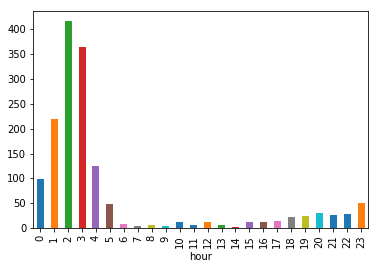

In [3]:
%matplotlib inline

# count by hour 
hourly = ba_data.groupby('hour').size()
hourly.plot.bar(x=hourly)

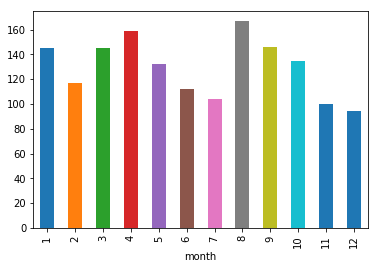

In [4]:
# count by month
monthly = ba_data.groupby('month').size()
monthly.plot.bar(x=monthly)

,year,month,day,hour,location,gender,Res1,Res2,meanRes
0,2017,12,17,1,Ames PD,M,0.046,0.046,0.0460
1,2017,12,14,3,ISU PD,F,0.121,0.120,0.1205
2,2017,12,10,5,ISU PD,F,0.068,0.067,0.0675
3,2017,12,10,3,ISU PD,F,0.077,0.077,0.0770
4,2017,12,9,2,ISU PD,M,0.085,0.084,0.0845


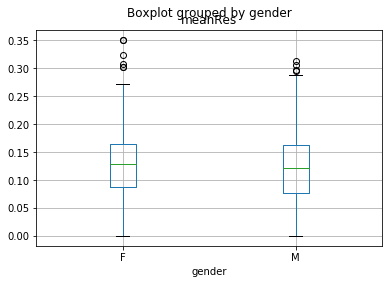

In [5]:
# count by gender
counts_gender = ba_data.gender.value_counts()

# create a dataset with no NAs in gender 
gen = ba_data.dropna(subset=['gender'])

# men or women blowing over more
mean_bas = gen.assign(meanRes=(gen[['Res1', 'Res2']].mean(1)))
display(mean_bas.head())
mean_bas.boxplot(['meanRes'], by = 'gender')

In [6]:
# Testing over once is bad, blowing over 0.08 is illegal. Hit rate for pull-overs vs inhebriation
duis = ba_data[(ba_data.Res1 > 0.08) | (ba_data.Res2 > 0.08)]
display(duis.head())
p_dui = duis.shape[0] /ba_data.shape[0]
p_dui

,year,month,day,hour,location,gender,Res1,Res2
1,2017,12,14,3,ISU PD,F,0.121,0.120
4,2017,12,9,2,ISU PD,M,0.085,0.084
5,2017,12,9,1,Ames PD,M,0.160,0.161
6,2017,12,7,3,Ames PD,M,0.131,0.131
8,2017,12,3,1,Ames PD,M,0.091,0.090


0.7448586118251928

In [11]:
# Creating proper datetime col
mean_bas['date'] = pd.to_datetime(mean_bas[['year', 'month', 'day']])
mean_bas['week'] = mean_bas.date.dt.week

mean_bas.head()

,year,month,day,hour,location,gender,Res1,Res2,meanRes,date,week
0,2017,12,17,1,Ames PD,M,0.046,0.046,0.0460,2017-12-17,50
1,2017,12,14,3,ISU PD,F,0.121,0.120,0.1205,2017-12-14,50
2,2017,12,10,5,ISU PD,F,0.068,0.067,0.0675,2017-12-10,49
3,2017,12,10,3,ISU PD,F,0.077,0.077,0.0770,2017-12-10,49
4,2017,12,9,2,ISU PD,M,0.085,0.084,0.0845,2017-12-09,49


week  year
1     2013     6
      2014     5
      2015     5
      2016     6
      2017     5
2     2013    12
      2014     3
      2015     8
      2016     7
      2017     9
Name: meanRes, dtype: int64

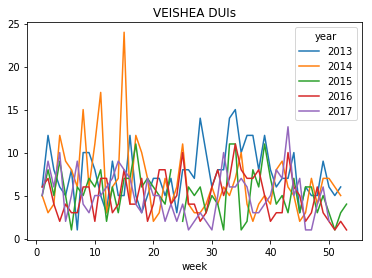

In [12]:
# choose and count the variables of interest  
timeline = mean_bas.groupby(['week','year']).count()['meanRes']
display(timeline.head(10))
timeline.unstack().plot(title='VEISHEA DUIs', legend=True)